### Random Forest Regressor



In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from utils.StockPricesProcess import load_prices_df, add_lags

# defining the path to the stock prices data and the date range
df_path = "../../data/stock_prices/yfinance/AAPL_prices.csv"
start_date_string = "2022-01-01"
end_date_string = "2023-01-01"

# Load stock prices and add lags using functions from StockPricesProcess.py
stock_data = load_prices_df(path=df_path, start_date_string=start_date_string, end_date_string=end_date_string)
stock_data = add_lags(stock_data=stock_data.copy(), numLags=3)
print(stock_data.shape)

stock_data.head(2)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(251, 8)


,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3
Date,,,,,,,,
2022-01-03 05:00:00+00:00,175.597058,180.583650,175.478569,179.724564,104487900,179.724564,179.724564,179.724564
2022-01-04 05:00:00+00:00,180.336790,180.642895,176.870854,177.443573,99310400,179.724564,179.724564,179.724564


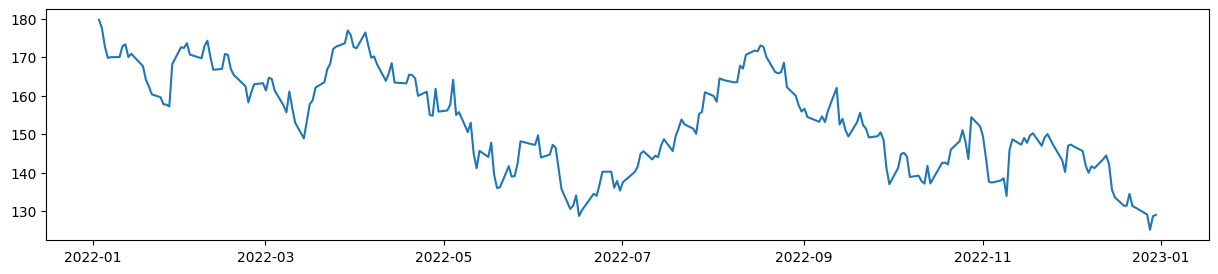

In [4]:
plt.figure(figsize=(15, 3))
plt.plot(stock_data.index, stock_data['Close'],)

In [5]:
features = ["Close_Lag1", "Close_Lag2", "Close_Lag3", "Volume"]
output_var = stock_data["Close"]

In [6]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock_data[features])

In [7]:
from sklearn.model_selection import TimeSeriesSplit


timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()




In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the metrics
print(f'Mean Absolute Error (MAE) - Random Forest: {mae_rf}')
print(f'Mean Squared Error (MSE) - Random Forest: {mse_rf}')
print(f'Root Mean Squared Error (RMSE) - Random Forest: {rmse_rf}')
print(f'R-squared (R2) Score - Random Forest: {r2_rf}')

Mean Absolute Error (MAE) - Random Forest: 3.27926174510609
Mean Squared Error (MSE) - Random Forest: 17.334273872406747
Root Mean Squared Error (RMSE) - Random Forest: 4.1634449524890735
R-squared (R2) Score - Random Forest: 0.6386886908740849


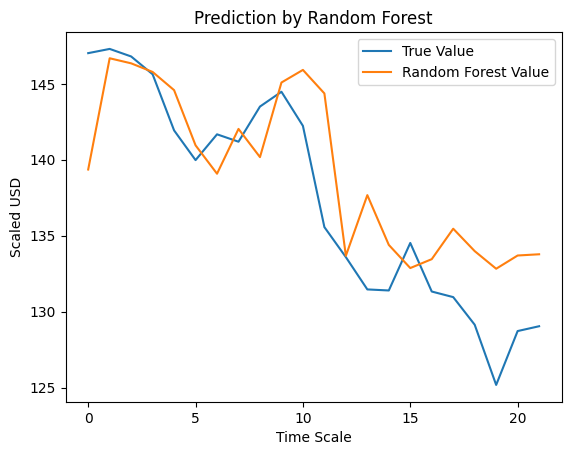

In [10]:
#Predicted vs True Adj Close Value – Random Forest
plt.plot(y_test, label="True Value")
plt.plot(y_pred_rf, label="Random Forest Value")
plt.title("Prediction by Random Forest")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

### Random Forest Regressor References

- [Random Forest in Python](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

- [Scikit-learn Documentation: RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

- [Time Series Split in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html)

- [Machine Learning for Time Series Data](https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/)

- [Random Forests for Time Series Prediction](https://towardsdatascience.com/random-forests-for-time-series-forecasting-a314ac850518)


